## Data Mining and Analysis Course Project Team Details:

### Team Id: 1A2

### Team Members:
Girish Mallya (64);
Baba Gouda patil (37);
Ganesh Gajakosh (59);
Ganesh Dubey (58)


## Title : Store Sales

## Problem Statement:
To predict sales for all the stores and the no of customers visiting the store,Analyze  the impact on sales  due to various factors such as holidays and competitor's store’s distances. 
and Analyze the impact on sales  based on the promotions offered by the stores.


### Dataset : Rossmann Store Sales dataset (https://www.kaggle.com/c/rossmann-store-sales)

### Description:
Rossmann operates over 3,000 drug stores in 7 European countries Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.



In [1]:
#Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
print ("Successfully imported all the necessary packages")
#Pandas is a python package which contains high level data structures and is used in data manipulation and analysis.
#Matplotlib is a plotting library in Python, which produces 2D graphics in different interactive environments.
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Populating the interactive namespace from numpy and matplotlib
Successfully imported all the necessary packages


In [2]:
import pandas as pd

### Girish Mallya (64)
### Reading the test and train data

In [3]:

#Reading the data
#train data contains the information about day of the week of sale, sales on that day, customers on that day, whether the store was open or not, whether it was a state holiday or a school holiday.
#store_data contains the information about the individual stores, such as what is the assortment, what is the competitor's store distances, since how long the competetors store has been open.

train_data=pd.read_csv("train.csv", low_memory=False)
store_data=pd.read_csv("store.csv")
test_data=pd.read_csv("test.csv")


In [4]:
#preview the data
train_data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [5]:
store_data.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [6]:
test_data.head(20)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


### Data preprocessing begins here

In [7]:

#the information about the stores such as holidays, promos, etc and the information about the sales,competetion_distance,store_type etc are available in different datasets, we merge them to make the training data easier to read
print ("Merging the stores and sales data")
combined_train_data=pd.merge(train_data,store_data, on="Store")

Merging the stores and sales data


In [8]:
print ("Previewing the combined data")
combined_train_data.head(400)

Previewing the combined data


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


## Removing noisy data
### Handling the NaN values : 

In [152]:

#Checking if there are any NaN rows
combined_train_data.isnull().values.any()

True

### True indicates that there are some NaN entries in the data, replacing those with zero

In [153]:
#There are some NaN in the data, such as promos, where if promo is not offered by the store, the NaN value is used in its place
#Replacing these NaN values with 0
combined_train_data.fillna(0, inplace=True)

In [154]:
combined_train_data.head(50)

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,NewAssortment,NewStoreType
0,1,Friday,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
1,1,Thursday,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
2,1,Wednesday,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
3,1,Tuesday,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
4,1,Monday,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
6,1,Saturday,4364,500,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
7,1,Friday,3706,459,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
8,1,Thursday,3769,503,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
9,1,Wednesday,3464,463,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3
10,1,Tuesday,3558,469,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,3


In [155]:
#Checking if there are any NaN values
combined_train_data.isnull().values.any()

False

#### Now it returns False, this means that the NaN entries have been sucessfully removed

## DATA TRANSFORMATION
### Reformating the date - from YYYY-MM-DD to DD-MM-YYYY

In [13]:
#First need to change the format of 'Date' Column to datetime
combined_train_data['Date'] = pd.to_datetime(combined_train_data['Date'], errors='coerce')
combined_train_data['Date'] = combined_train_data['Date'].dt.strftime('%d-%m-%Y')

In [16]:
combined_train_data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Store,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DayOfWeek,5,4,3,2,1,7,6,5,4,3,2,1,7,6,5,4,3,2,1,7
Date,31-07-2015,30-07-2015,29-07-2015,28-07-2015,27-07-2015,26-07-2015,25-07-2015,24-07-2015,23-07-2015,22-07-2015,21-07-2015,20-07-2015,19-07-2015,18-07-2015,17-07-2015,16-07-2015,15-07-2015,14-07-2015,13-07-2015,12-07-2015
Sales,5263,5020,4782,5011,6102,0,4364,3706,3769,3464,3558,4395,0,4406,4852,4427,4767,5042,5054,0
Customers,555,546,523,560,612,0,500,459,503,463,469,526,0,512,519,517,550,544,553,0
Open,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0
Promo,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
StateHoliday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SchoolHoliday,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
StoreType,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c


### Creating seperate columns for month and Year to analyze the data better.


In [17]:
combined_train_data['Year'] = pd.DatetimeIndex(combined_train_data['Date']).year
combined_train_data['Month'] = pd.DatetimeIndex(combined_train_data['Date']).month

In [18]:
#preview of the data after reformatting the date
combined_train_data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,30-07-2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,29-07-2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,28-07-2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,27-07-2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
5,1,7,26-07-2015,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
6,1,6,25-07-2015,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
7,1,5,24-07-2015,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
8,1,4,23-07-2015,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
9,1,3,22-07-2015,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


### Converting 'DayOfWeek' from numerical form to weekday name, so as to make the data easier to understand


In [19]:
combined_train_data['Date'] = pd.to_datetime(combined_train_data['Date'])
combined_train_data['DayOfWeek'] = combined_train_data['Date'].dt.weekday_name

In [20]:
combined_train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,Friday,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,Thursday,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,Wednesday,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,Tuesday,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,Monday,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


## Handling missing values  :
### After running the removal of NaN all the missing values in CompetitionDistance have been replaced with zeros
### These are considered as missing values
### Checking if there are any zeros 

In [135]:
(combined_train_data['CompetitionDistance'] == 0).any()

False

### It has return True which means that there are missing values
### We have chosen to replace these values with the median because, Median is the best measure of central tendency for large data

In [136]:
#Some CompetitionDistance values are blank in the Data, We have assumed this to mean that the data of nearest competetor stores couldn't be found, therefore, these values are replaced with Median distance. '
median_cd = combined_train_data['CompetitionDistance'].median(skipna=True)

In [137]:
combined_train_data['CompetitionDistance']=combined_train_data.CompetitionDistance.mask(combined_train_data.CompetitionDistance == 0,median_cd)

### Removal of unnecessary entries 

In [138]:
# remove all rows(store,date) that are closed as this data doesn't help in predicting the sales on the working days
combined_train_data = combined_train_data[combined_train_data["Open"] != 0]
initial_size= combined_train_data.shape[0]

KeyError: 'Open'

In [139]:
#Performing the same merge operation on test data
combined_test_data=pd.merge(test_data,store_data, on="Store")

### Similar Techniques are used to handle the noisy values as the Train Data

In [140]:
#Preview the test data
print ("Previewing the combined test data")
combined_test_data.head()

Previewing the combined test data


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [156]:
#Handling the NaN values, first checking if there are any NaN
combined_test_data.isnull().values.any()

False

In [157]:
#Replacing the NaN values with 0
combined_test_data.fillna(0, inplace=True)

In [158]:
#checking again for NaN

In [159]:
combined_test_data.isnull().values.any()

False

In [160]:
#Reformating the date - from YYYY-MM-DD to DD-MM-YYYY for better readability
#First need to change the format of 'Date' Column to datetime
combined_test_data['Year'] = pd.DatetimeIndex(combined_test_data['Date']).year
combined_test_data['Month'] = pd.DatetimeIndex(combined_test_data['Date']).month

In [161]:
#Preview the test data
print ("Previewing the combined test data")
combined_test_data.head()

Previewing the combined test data


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,NewAssortment,NewStoreType,Year,Month
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,9.0,2008.0,0,0.0,0.0,0,1,3,2015,9
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,...,9.0,2008.0,0,0.0,0.0,0,1,3,2015,9
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,...,9.0,2008.0,0,0.0,0.0,0,1,3,2015,9
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,...,9.0,2008.0,0,0.0,0.0,0,1,3,2015,9
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,...,9.0,2008.0,0,0.0,0.0,0,1,3,2015,9


In [33]:
#Converting 'DayOfWeek' from numerical form to weekday name, so as to make the data easier to understand
combined_test_data['Date'] = pd.to_datetime(combined_test_data['Date'])
combined_test_data['DayOfWeek'] = combined_test_data['Date'].dt.weekday_name

In [34]:
#Drop the days where the store has remained closed as there is no point in that data being present for the test data
combined_test_data = combined_test_data[combined_test_data["Open"] != 0]

### Dealing with Outliers 

In [35]:
# Python Function to remove outliers
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val, col_values>=max_val), np.NaN, col_values)
    return df

### Since the Data is very large, it isn't easy to observe and detect outliers, therefore we have applied the turkey method of detecting the outliers using Inter-Quartile-range(IQR)


In [36]:
##The formulas are:
##Low outliers = Q1 – 1.5(Q3 – Q1) = Q1 – 1.5(IQR)
##High outliers = Q3 + 1.5(Q3 – Q1) = Q3 + 1.5(IQR)
#Where:
#Q1 = first quartile
#Q3 = third quartile
#IQR = Interquartile range
Q1 = combined_train_data['CompetitionDistance'].quantile(0.25)
Q3 = combined_train_data['CompetitionDistance'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR is ")
print (IQR)
max_value= Q3 + 1.5*IQR
print ("Max Value is")
print (max_value)

#Since all the CompetitionDistance Data are positive, there are no "outliers" (by the present definition) on the low side.
#Therfore we can assign the min_value to 0
min_value=0

IQR is 
6170.0
Max Value is
16135.0


In [37]:
combined_train_data = remove_outliers(df = combined_train_data, column = 'CompetitionDistance', min_val = 0, max_val = 24000)
final_size=combined_train_data.shape[0]

In [38]:
#method2
combined_train_data[np.abs(combined_train_data.CompetitionDistance-combined_train_data.CompetitionDistance.mean())<=(3*combined_train_data.CompetitionDistance.std())]
combined_train_data.shape[0]

844392

In [39]:
print("Preview the data after removal of outliers")
combined_train_data.head(30)

Preview the data after removal of outliers


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,Friday,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,Thursday,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,Wednesday,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,Tuesday,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,Monday,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
6,1,Saturday,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
7,1,Friday,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
8,1,Thursday,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
9,1,Wednesday,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
10,1,Tuesday,2015-07-21,3558,469,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [40]:
print("performing the same removal of outliers for test data")

performing the same removal of outliers for test data


In [41]:
combined_test_data = remove_outliers(df = combined_test_data, column = 'CompetitionDistance', min_val = 0, max_val = 24000)

In [42]:
#Taking the information about stores, Customers and CompetitionDistance 
dfi=combined_train_data[['Store','Customers','CompetitionDistance']]

In [43]:
#dfi=dfi.groupby(['Store','CompetitionDistance'],as_index=False)['Customers'].sum()

In [44]:
data_size_after_outliers= combined_train_data.shape[0]
print(data_size_after_outliers)

844392


### converting ungrouped data to grouped

In [45]:
#Since the competition distance of the stores are in ungrouped data, we are going to group it, into classes of width 2000.
#And we are going to calculate the number of customers that visit the stores at each of these classes.


l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
dfi = dfi.groupby(pd.cut(dfi['CompetitionDistance'], bins=b, labels=l))['Customers'].sum().fillna(0).reset_index()

In [46]:
dfi.head(23)
#After seeing the results you might be thinking, why are more customers going to the shops which have competition nearby,
#Observationally, one can determine, that more customers are going to the stores which have competitors nearby.
#This data in itself is not sufficient to analyze, the information, because we have not found out how many stores are there which fall into the groups

,CompetitionDistance,Customers
0,0-2000,335696813
1,10000-12000,11615833
2,12000-14000,12208906
3,14000-16000,13485316
4,16000-18000,12538128
5,18000-20000,12158500
6,2000-4000,104662929
7,20000-22000,8434676
8,22000-24000,5002194
9,4000-6000,53514645


In [47]:
#We need information about the number of stores that fall in the various competitionDistance groups
#dfs is the dataframe that stores only the relevant information about the stores, the ones which we are interested in, Store, and CompetitionDistance
dfs=store_data[['Store','CompetitionDistance']]

In [48]:
#Similar to how we had done above, we group the CompetitionDistance in classes of 2000 distances and counting the number of stores that come in each of these distances
l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
dfs = dfs.groupby(pd.cut(dfs['CompetitionDistance'], bins=b, labels=l))['Store'].count().fillna(0).reset_index()

In [49]:
dfs.head(10)

,CompetitionDistance,Store
0,0-2000,502
1,10000-12000,26
2,12000-14000,27
3,14000-16000,26
4,16000-18000,26
5,18000-20000,25
6,2000-4000,202
7,20000-22000,14
8,22000-24000,9
9,4000-6000,103


In [50]:
#Merge the data set that holds the information about the total customers and the number of stores in each distance range, so that we can get both the information in the sane table
df=pd.merge(dfi,dfs,on="CompetitionDistance")

In [51]:
df.head()

,CompetitionDistance,Customers,Store
0,0-2000,335696813,502
1,10000-12000,11615833,26
2,12000-14000,12208906,27
3,14000-16000,13485316,26
4,16000-18000,12538128,26


In [52]:
#The best metric to analyze how CompetitorDistance is affecting the sales is my measuring the average customer per store at each of these classes of distances
df['Customer/Store'] = df['Customers']/df['Store']

In [53]:
df.head(14)

,CompetitionDistance,Customers,Store,Customer/Store
0,0-2000,335696813,502,668718.750996
1,10000-12000,11615833,26,446762.807692
2,12000-14000,12208906,27,452181.703704
3,14000-16000,13485316,26,518666.000000
4,16000-18000,12538128,26,482235.692308
5,18000-20000,12158500,25,486340.000000
6,2000-4000,104662929,202,518133.311881
7,20000-22000,8434676,14,602476.857143
8,22000-24000,5002194,9,555799.333333
9,4000-6000,53514645,103,519559.660194


### Data Visualization

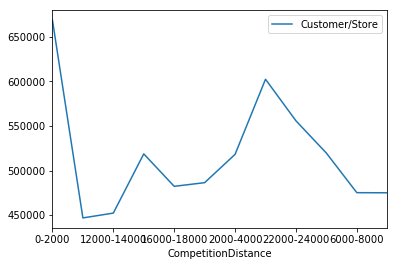

In [54]:
#Plot the information about  Customers/Store 
df.plot(x='CompetitionDistance',y='Customer/Store')



### Does it logically make sense? more customers in the stores which have competition Nearby? No, it doesn't. The explaination for why this might be is below

In [55]:
#There is an attribute 'Promo' in the dataset, which determines if the store is offering a promo or not
#We are trying to analyze if this promo is what is affecting the customers count in the stores having competitions nearby,
dfs1=combined_train_data[['Store','Customers','Promo','Sales','CompetitionDistance']]

In [56]:
#Take only those stores which are offering promos.
dfs1= dfs1[dfs1["Promo"] != 0]

In [57]:
#Classify CompetitionDistance similar to how it was done above.
#Count the number of stores in each class which are offering promo
l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
dfs1 = dfs1.groupby(pd.cut(dfs1['CompetitionDistance'], bins=b, labels=l))['Store'].count().fillna(0).reset_index()

In [58]:
dfs1=dfs1.rename(columns={'Store' : 'NoOfDaysPromosOffered'})

In [59]:
dfs1.head()

,CompetitionDistance,NoOfDaysPromosOffered
0,0-2000,169660
1,10000-12000,8691
2,12000-14000,9009
3,14000-16000,8912
4,16000-18000,8566


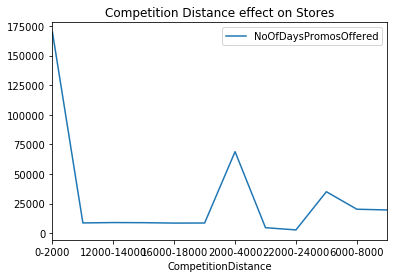

In [60]:
#Plot the information
dfs1.plot(x='CompetitionDistance',y='NoOfDaysPromosOffered',title='Competition Distance effect on Stores')

### This means that the stores who have competition Nearby, they are aggressively promoting their offers

In [61]:
#Taking only information about Promo, to analyze how many customers will visit the stores if there's Promo Offered or not offered
dfnp = combined_train_data[combined_train_data["Promo"] != 1]
#dfnp is the dataframe that represents no_promo.

In [62]:
#Finding out the totalnumber of days Promo was not offered
no_of_daysNPromo=dfnp.shape[0]
print(no_of_daysNPromo)

467496


In [63]:
dfp= combined_train_data[combined_train_data["Promo"] != 0]
#dfnp is the dataframe that represents promo.
no_of_daysPromo=dfp.shape[0]
#Finding out the totalnumber of days Promo was offered

print(no_of_daysPromo)

376896


In [64]:
#calculating the total customers in each store when promo was offered
dfp=dfp.groupby(by=['Store'])['Customers'].sum()

In [65]:
#calculating the total customers in each store when promo was not offered
dfnp=dfnp.groupby(by=['Store'])['Customers'].sum()

In [66]:
dfnp.head()

Store
1    232615
2    213522
3    277873
4    545353
5    189204
Name: Customers, dtype: int64

In [67]:
dfp.head()

Store
1    207908
2    244333
3    306437
4    490901
5    229384
Name: Customers, dtype: int64

In [68]:
#Calculating the total customers who visit a store if Promo is not offered
sum_without_promo=dfnp.sum()
sum_without_promo

325777807L

In [69]:
#calculating the total customers who visit a store if Promo is offered
sum_with_promo=dfp.sum()
sum_with_promo

318263948L

In [70]:
#Dividing by the total number of days promo was offered, we get the average customer per day in case of promo being offered
customersPerDay=sum_with_promo/no_of_daysPromo
#This is the average customers per day if Promo was offered

In [71]:
print(customersPerDay)

844


In [72]:
#dividing by the total number of days promo was not offered, we get the average customer per day in case of promo being offered
customersPerDay2=sum_without_promo/no_of_daysNPromo
#this is the average customers per day if promo was offered

In [73]:
print(customersPerDay2)

696


In [74]:
#Creating a dataframe to hold these 2 averages. so that we can plot the information and visualize it.
ts1=['Promo','NoPromo']
#creating a list to store the 'offer'
ts2=[customersPerDay,customersPerDay2]
#creating a list to store the averages.
cust=pd.DataFrame(ts2,columns=['CustomersPerDay'])
#creating a dataframe to hold average customers.

In [75]:
cust.head()

,CustomersPerDay
0,844
1,696


In [76]:
cust2=pd.DataFrame(ts1,columns=['Offer'])
#Creating a dataframe to hold Offer

In [77]:
cust2.head()

,Offer
0,Promo
1,NoPromo


In [78]:
#Creating a row temp with val 1 so that we can have a common column to perform merge on
cust['tmp']=1
cust2['tmp']=1

In [79]:
dfc=pd.merge(cust,cust2,on=['tmp'])

In [80]:
dfc.head()

,CustomersPerDay,tmp,Offer
0,844,1,Promo
1,844,1,NoPromo
2,696,1,Promo
3,696,1,NoPromo


In [81]:
#Dropping redundant indices
dfc=dfc.drop(dfc.index[[1,2]])

In [82]:
#dropping the temporary column we created to merge
dfc=dfc.drop('tmp', axis=1)

In [83]:
dfc.head()

,CustomersPerDay,Offer
0,844,Promo
3,696,NoPromo


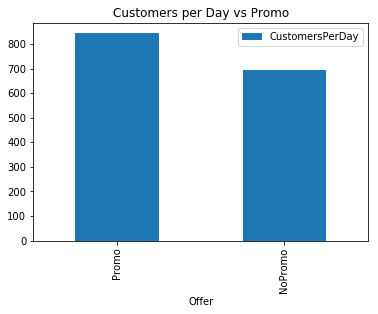

In [84]:
dfc.plot(kind='bar', x='Offer',title='Customers per Day vs Promo')
#plotting a bar graph to represent the above data


### It can be seen that Customers Per Day are higher in case of Promo being offered compared to Not being offered

In [85]:
#dfso is the dataframe when store is open
dfso= combined_train_data[combined_train_data["Open"] != 0]

In [86]:
#dfs1 is the dataframe which includes only those stores that were open on a SchoolHoliday
dfs1= dfso[dfso["SchoolHoliday"] == 1]
#dfs2 is the dataframe which includes only those stores that were open on a StateHoliday
dfs2= dfso[dfso["StateHoliday"]==1]
print(dfs2.shape[0])

0


In [87]:
#dfs2 is null

In [88]:
#Calculating the total Customers Per who visit the store on a schoolholiday
dfs1=dfs1.groupby(by=['Store'])['Customers'].sum()

In [89]:
#the total number of days the store was open on a schoolholiday
Count=dfs1.shape[0]

In [90]:
#Calculating the Average 
AvgCustPerStore=dfs1.sum()/Count

In [91]:
#Average customers per Store if store is open on holidays
print(AvgCustPerStore)

114804


In [92]:
#dfs3 is a dataframe that holds information about the stores that remain closed on a schoolholiday
dfs3=dfso[dfso['SchoolHoliday']!=1]

In [93]:
#calculating the total customers that visit the stores that are closed on schoolholidays
dfs3=dfs3.groupby(by=['Store'])['Customers'].sum()

In [94]:
#calculating the number of days the stores were open 
Count2=dfs3.shape[0]

In [95]:
#calculating the average
AvgCustPerStore2=dfs3.sum()/Count2

In [96]:
print(AvgCustPerStore2)

462811


In [97]:
#Creating a dataframe to store these 2 averages so that we can display a bar graph for this infromation
ts2=[AvgCustPerStore,AvgCustPerStore2]

In [98]:
cust3=pd.DataFrame(ts2,columns=['CustomersPerStore'])

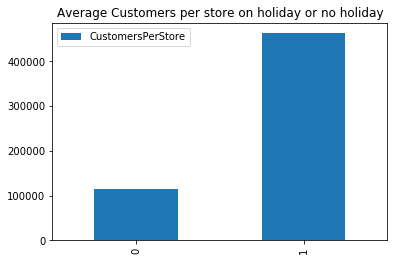

In [99]:
cust3.plot(kind='bar',title='Average Customers per store on holiday or no holiday')

### 0 Bar represents the AvgCustomersPerStore on SchoolHolidays

### 1 Bar represents the AvgCustomerPerStore on Days other than schoolHolidays

### Babagouda Patil (37)

In [100]:

#Determining how Assortment affects the Customers.
dfsa=combined_train_data.groupby(by=['Assortment'])['Customers'].mean()
#dfsa is a dataframe that stores the data about each assortment type and the total customers that visit these stores.

In [101]:
dfsa.head()

Assortment
a     747.943822
b    2066.795543
c     752.169959
Name: Customers, dtype: float64

### visualize how Customers vary according to assortments

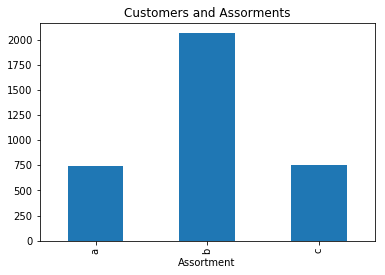

In [102]:
#Plotting a bar chart to 
dfsa.plot(kind='bar',title='Customers and Assorments')

In [103]:
#Determining how StoreType affects the Customers
dfss=combined_train_data.groupby(by=['StoreType'])['Customers'].sum()
#dfss is the dataframe that is holding the information about the total customers that visit each store type.

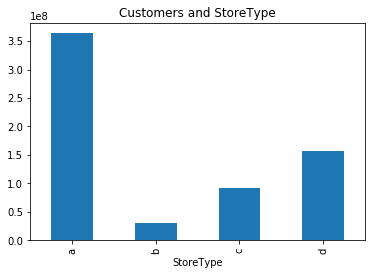

In [104]:
#plotting a bar graph to visualize how customers vary as store type varies 
dfss.plot(kind='bar',title='Customers and StoreType')

In [105]:
#Determining how DayOfTheWeek Affects the totalCustomers
dfsd=combined_train_data.groupby(by=['DayOfWeek'])['Customers'].sum()
#dfsd is the dataframe that holds the infromation about the Total customers that visit the store each day

In [106]:
dfsd.head(7)

DayOfWeek
Friday       103663000
Monday       103822824
Saturday      92327469
Sunday        39554297
Thursday      96233782
Tuesday      110426213
Wednesday     98014170
Name: Customers, dtype: int64

### Ganesh Gajakosh (59)

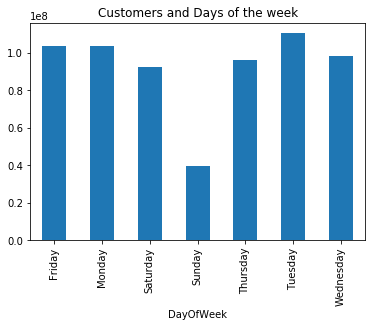

In [107]:

#displaying a bar graph to represnt how customers vary throughout the days of the week
dfsd.plot(kind='bar',title='Customers and Days of the week')

In [108]:
#Determining how DayOfTheWeek Affects the total sales
dfsd=combined_train_data.groupby(by=['DayOfWeek'])['Sales'].sum()
#dfsd is the dataframe that holds the infromation about the Total customers that visit the store each day

In [109]:
dfsd.head(7)

DayOfWeek
Friday        938010989
Monday        980305411
Saturday      824015716
Sunday        354247910
Thursday      861688546
Tuesday      1023536329
Wednesday     891375722
Name: Sales, dtype: int64

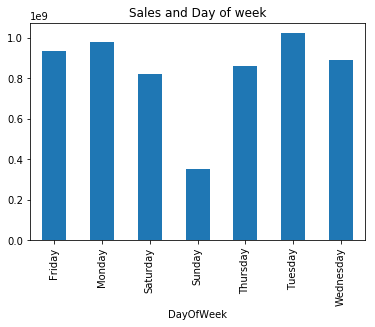

In [110]:
#displaying a bar graph to display how sales vary acording to the day of the week
dfsd.plot(kind='bar',title='Sales and Day of week')

### Girish Mallya (64)


In [111]:
#PromoInterval describes the consectuive intervals promo2 is started, naming the months and promotion started anew.
#eg- "Feb,May,Aug,Nov" means each round of promotion starts in February, May, August, November of any given year
dfsd=combined_train_data.groupby(by=['PromoInterval'])['Sales'].sum()

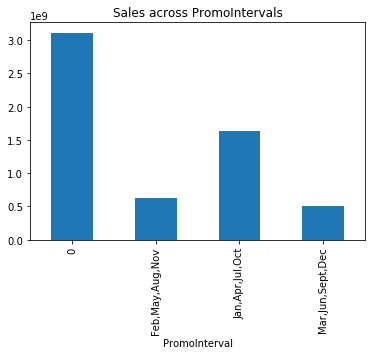

In [112]:
#Visualizing how sales have varried across various PromoIntervals
dfsd.plot(kind='bar',title='Sales across PromoIntervals')

In [113]:
#Promo2SinceWeek is a attribute which represents which calender week the store is participating in continuous Promotion
dfp1=combined_train_data[combined_train_data['Promo2SinceWeek']!=0]
#we don't want the stores that are not participating in continuous promotion 
#therefore we remove those stores whose promo2sinceweek is 0

In [114]:
dfp1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
942,2,Friday,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7
943,2,Thursday,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7
944,2,Wednesday,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7
945,2,Tuesday,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7
946,2,Monday,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7


In [115]:
dfp1=dfp1.groupby(by=['Promo2SinceWeek'])['Sales'].sum()

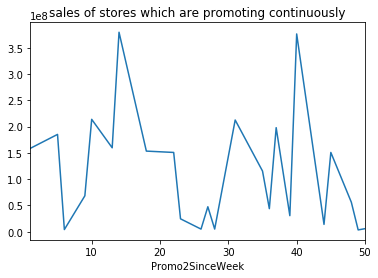

In [116]:
dfp1.plot(title='sales of stores which are promoting continuously')

In [117]:
#To determine how average sales have varied as Competitor has started.
#for example, let's take store_id = 5
store_id = 5
#taking only the information relevant to the store id of choice
dfs5 = combined_train_data[combined_train_data["Store"] == store_id]
#calculating the average sales per day for the store id of choice
average_store_sales = dfs5.groupby('Date')["Sales"].mean()

###  how average sales have varied as Competitor has started.

In [118]:
#finding the year and month of the introduction of the Competitor
y = combined_train_data["CompetitionOpenSinceYear"].loc[combined_train_data["Store"]  == store_id].values[0]
m = combined_train_data["CompetitionOpenSinceMonth"].loc[combined_train_data["Store"] == store_id].values[0]

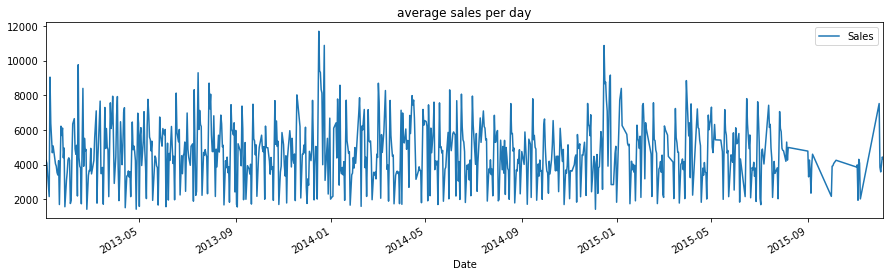

In [119]:
#plot the average sales per day
ax=average_store_sales.plot(legend=True,figsize=(15,4),title='average sales per day')
#Make sure that the competitor was introduced after 2013, because the training data only has information from 2013 to 2015 
if y >= 2013:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='red')
    

### line to indicate the month that the Competitor was introduced

In [120]:
#model
# Notice that test_df has only year=2015, and months 8 & 9

# drop Year and Month
combined_train_data.drop(["Year", "Month"], axis=1, inplace=True)

In [121]:
# drop unnecessary columns, these columns won't be useful in prediction
combined_train_data.drop(["Open", "Date"], axis=1, inplace=True)

In [122]:
combined_train_data.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,Friday,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,Thursday,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,Wednesday,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,Tuesday,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,Monday,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [132]:
# save ids of closed stores, because we will assign their sales value to 0 later(see below)
closed_store_ids = test_data["Id"][test_data["Open"] == 0].values

# remove all rows(store,date) that were closed
combined_test_data = test_data[test_data["Open"] != 0]

# drop unnecessary columns, these columns won't be useful in prediction
combined_test_data.drop(['Open', 'Date'], axis=1,inplace=True)



C:\Users\Hp\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### mapping of categorical data to numerical data to use in regressions
As we can only use numerical data in regression 

In [145]:

equiv = {'a':1, 'b':2, 'c':3}
combined_train_data["NewAssortment"] = combined_train_data["Assortment"].map(equiv)
combined_test_data["NewAssortment"] = combined_test_data["Assortment"].map(equiv)


equiv1 = {'a':1, 'b':2, 'c':3 , 'd':4}
combined_train_data["NewStoreType"] = combined_train_data["StoreType"].map(equiv1)
combined_test_data["NewStoreType"] = combined_test_data["StoreType"].map(equiv1)


## Predicting Sales from Regression

In [162]:
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [173]:
from pandas import Series,DataFrame

In [174]:
combined_train_data1 = combined_train_data.sample(frac=0.2) # this is now a random sample of half the dataframe
combined_train_data1.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,NewAssortment,NewStoreType
821941,902,Saturday,4836,617,0,0,0,a,a,310.0,5.0,2015.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",1,1
888283,975,Tuesday,13107,982,1,0,1,a,c,9630.0,0.0,0.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",3,1
6169,7,Friday,6369,656,0,0,0,a,c,0.0,4.0,2013.0,0,0.0,0.0,0,3,1
411165,451,Saturday,6368,536,1,0,0,a,a,2460.0,4.0,2009.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1,1
596147,655,Wednesday,7960,671,1,0,0,d,c,960.0,11.0,2012.0,1,5.0,2013.0,"Feb,May,Aug,Nov",3,4


## Splitting Train Data into 70% train data and 30% test data

In [175]:
# create X and y
feature_cols = ['CompetitionDistance','Promo','Promo2','NewAssortment','NewStoreType']
X = combined_train_data1[feature_cols]
y = combined_train_data1.Sales
y1 = combined_train_data1.Customers
test=combined_test_data

In [191]:
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test =cross_validation.train_test_split(X, y, test_size=0.3, random_state=42)

In [193]:
labels_train.head()

591303    4657
766396    1492
181959    4885
563625    4794
197741    3916
Name: Sales, dtype: int64

## Building a Regression Model to Predict Sales

### Linear regression 

In [448]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,accuracy_score
train_er={}
val_er={}
i=0
mod1={}
def linear_reg(i):
# Create linear regression object
        s=100000000
        regr = linear_model.LinearRegression(fit_intercept=d[i], normalize=True, copy_X=False, n_jobs=1)

        # Train the model using the training sets
        regr.fit(features_train, labels_train)
# Make predictions using the testing set
        pred = regr.predict(features_train)
        pred1= regr.predict(features_test)

#print(accuracy_score(labels_train,pred))
        print 'For the parameter fit_intercept:',d[i]
        print'train error:',mean_absolute_error(labels_train,pred)
        print'validation error:',mean_absolute_error(labels_test,pred1)
        train_er[i]=mean_absolute_error(labels_train,pred)
        val_er[i]=mean_absolute_error(labels_test,pred1)
        k=val_er[i]-train_er[i]
        if(k<0):
            k=k*-1
        if (k<s):
            s=k
            mod1[train_er[i]]=mean_absolute_error(labels_train,pred)
            
        
        print'********************************************************'
        

In [450]:
d={1:True,2:False}
for i in d:
    linear_reg(i)
print train_er
print val_er


For the parameter fit_intercept: True
train error: 2056.98875861
validation error: 2059.82395433
*********************************************************
For the parameter fit_intercept: False
train error: 2604.41626376
validation error: 2592.30271029
*********************************************************
{1: 2056.9887586147056, 2: 2604.4162637613422}
{1: 2059.8239543255368, 2: 2592.3027102870519}


<function matplotlib.pyplot.show>

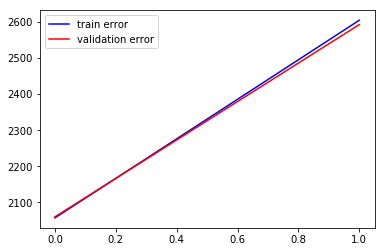

In [263]:
plt.plot(train_er.values(),'b')
plt.plot(val_er.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

In [455]:
s=[]
for k in val_er.values():
    
    for j in train_er.values():
        s.append(k-j)
        break
        continue

[2.8351957108311581, 535.31395167234632]

### Regression Using Stat Model to Predict Sales

In [217]:
#Linear regression using SMF
import statsmodels.formula.api as smf
from sklearn.metrics import explained_variance_score, r2_score,accuracy_score,mean_absolute_error

# create a fitted model in one line

lm = smf.ols(formula='Sales ~ Promo +Promo2  + CompetitionDistance + NewAssortment + NewStoreType', data=combined_train_data1).fit()
y_pred=lm.predict(X)
print("explained variance score is - ")
print(explained_variance_score(y,y_pred))
print("r2 score is ")
print(r2_score(y,y_pred))
#print("Accuracy score is ")
#print(accuracy_score(,y_pred))
print("Mean absolute error is:")
print(mean_absolute_error(y,y_pred))
# print the coefficients
lm.params
#explained variance score = 1 - var(y_hat - y_true) / var(y_true), where the var is biased variance
#i.e. var(y_hat - y_true) = sum(error^2 - mean(error))/n. Compared with R2, the only difference is from the mean(error). if mean(error)=0, then R2 = explained variance score


explained variance score is - 
0.164339755221
r2 score is 
0.164339755221
Mean absolute error is:
2057.452485


Intercept              5812.630272
Promo                  2288.597336
Promo2                 -794.550096
CompetitionDistance      -0.016235
NewAssortment           380.035925
NewStoreType            -69.738561
dtype: float64

##  Regression using k neighbour Regressor

In [358]:
##modelling using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error
train_er={}
val_er={}
def print_model(zad,j):
    ##from sklearn import tree
    ##from sklearn.linear_model import LogisticRegression
    #for i in zad:
    while zad[1]<10:
        zad[2]=1
        while zad[2]<10:
            ##from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
            ##random_state=1
            clf = KNeighborsRegressor(n_neighbors=zad[1], leaf_size=zad[2])
            ### Gaussian Naive Bayes
            ### from sklearn.naive_bayes import GaussianNB
            ### clf = GaussianNB()

            ##SVM
            ##from sklearn import svm
            ##clf = svm.SVC(kernel="rbf") 

            clf.fit(features_train, labels_train)
            #clf.fit(x,y)

            prediction = clf.predict(features_train)
            pred=clf.predict(features_test)

            ##calculating accuracy
    #print accuracy_score(labels_test,prediction)
            print("No of Nearest neighbour are",zad)
    #print("Explained variance score")
    #print(explained_variance_score(labels_test,prediction))
    #print("r2 score")
    #print(r2_score(labels_test,prediction))
    #print("MSE")
    #print(mean_squared_error(labels_test,prediction))
    #print("Accuracy :")
    #print(accuracy_score(labels_test,prediction))
            print("train error:")
            print(mean_absolute_error(labels_train,prediction))
            print("validation error:")
            print(mean_absolute_error(labels_test,pred))
            print("*************************************************\n\n")
            train_er[j]=mean_absolute_error(labels_train,prediction)
            val_er[j]=mean_absolute_error(labels_test,pred)
            zad[2]=zad[2]+2
            j=j+1
        zad[1]=zad[1]+2


In [359]:
zad={1:1,2:1}
j=1
print_model(zad,j)
print train_er

('No of Nearest neighbour are', {1: 1, 2: 1})
train error:
1664.51539581
validation error:
1701.47566319
*************************************************


('No of Nearest neighbour are', {1: 1, 2: 3})
train error:
1658.76276922
validation error:
1696.87620401
*************************************************


('No of Nearest neighbour are', {1: 1, 2: 5})
train error:
1651.32128174
validation error:
1684.15926496
*************************************************


('No of Nearest neighbour are', {1: 1, 2: 7})
train error:
1651.32128174
validation error:
1684.15926496
*************************************************


('No of Nearest neighbour are', {1: 1, 2: 9})
train error:
1658.16299254
validation error:
1695.81487841
*************************************************


('No of Nearest neighbour are', {1: 3, 2: 1})
train error:
1368.43111081
validation error:
1395.64487605
*************************************************


('No of Nearest neighbour are', {1: 3, 2: 3})
train error:

<function matplotlib.pyplot.show>

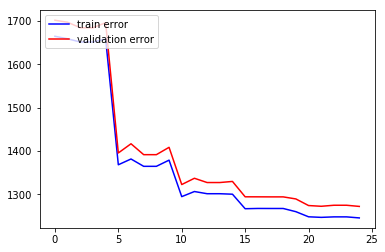

In [360]:
plt.plot(train_er.values(),'b')
plt.plot(val_er.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

## Regression using xgboost 

In [465]:

from sklearn.model_selection import train_test_split  
from xgboost.sklearn import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  
                                                    random_state=42)
val_errr={}
train_errr={}




def print_vals(vals,j):
    while vals[1]<20:
        vals[2]=1
        while vals[2]<20:
            vals[5]=0.1
            while vals[5]<1:
                max_depth = vals[1]
                min_child_weight = vals[2]
                subsample = 0.5
                colsample_bytree = 0.8
                objective = 'reg:linear'
                num_estimators = 1000
                learning_rate = vals[5]

                features = features_train
                target = labels_train
                mdl = XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)
                mdl.fit(features, target)
                predicted = mdl.predict(features_test)
                pred=mdl.predict(features_train)

#r2_score(predicted, y_test)
#explained_variance_score(y_test,predicted)

#print accuracy_score(labels_test,prediction)
                print'train error',mean_absolute_error(labels_train,pred)
                train_errr[j]=mean_absolute_error(labels_train,pred)
                print'validation error',mean_absolute_error(labels_test,predicted)
                val_errr[j]=mean_absolute_error(labels_test,predicted)
                print'*************************************************************'
                j=j+1
                vals[5]=vals[5]+0.5
            vals[2]=vals[2]+4
        vals[1]=vals[1]+4

In [466]:
vals={1:2,2:1,3:0.5,4:1000,5:0.1}
j=0
print_vals(vals,j)

train error 1745.70042429
validation error 1753.59540976
*************************************************************
train error 1565.16488857
validation error 1573.32675033
*************************************************************
train error 1745.70042429
validation error 1753.59540976
*************************************************************
train error 1565.16488857
validation error 1573.32675033
*************************************************************
train error 1745.70042429
validation error 1753.59540976
*************************************************************
train error 1565.16488857
validation error 1573.32675033
*************************************************************
train error 1745.70042429
validation error 1753.59540976
*************************************************************
train error 1565.16488857
validation error 1573.32675033
*************************************************************
train error 1745.70042429
validation error 1753.

KeyboardInterrupt: 

<function matplotlib.pyplot.show>

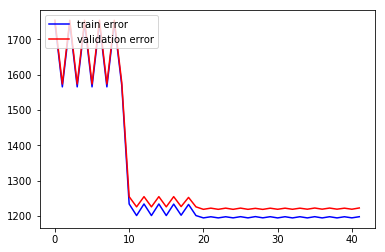

In [467]:
plt.plot(train_errr.values(),'b')
plt.plot(val_errr.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

## Decision Tree Regressor

In [399]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn import tree
features = features_train
target = labels_train
val_er1={}
train_er1={}
def print_model1(val,i):
    while val[1]<3:
        val[2]=2
        while val[2]<5:
            val[3]=1
            while val[3]<3:
                model = tree.DecisionTreeRegressor( max_depth=val[1], min_samples_split=val[2], min_samples_leaf=val[3]) 
                model.fit(features, target)
                predicted = mdl.predict(features_train)
                pred=mdl.predict(features_test)
#r2_score(predicted, y_test)
                print'Train error',mean_absolute_error(labels_train,predicted)
                train_er1[i]=mean_absolute_error(labels_train,predicted)
                print'validation error',mean_absolute_error(labels_test,pred)
                val_er1[i]=mean_absolute_error(labels_test,pred)
                print'************************************************'
                i=i+1
                val[3]=val[3]+1
            val[2]=val[2]+1
        val[1]=val[1]+1

In [400]:
i=0
val={1:1,2:2,3:1}
print_model1(val,i)

Train error 1198.16066797
validation error 1221.40183991
************************************************
Train error 1198.16066797
validation error 1221.40183991
************************************************
Train error 1198.16066797
validation error 1221.40183991
************************************************
Train error 1198.16066797
validation error 1221.40183991
************************************************
Train error 1198.16066797
validation error 1221.40183991
************************************************
Train error 1198.16066797
validation error 1221.40183991
************************************************
Train error 1198.16066797
validation error 1221.40183991
************************************************
Train error 1198.16066797
validation error 1221.40183991
************************************************
Train error 1198.16066797
validation error 1221.40183991
************************************************
Train error 1198.16066797
validation error 122

<function matplotlib.pyplot.show>

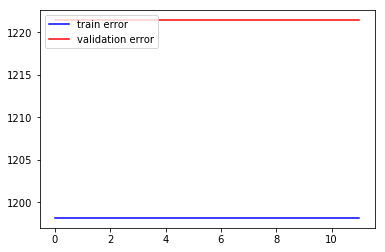

In [401]:
plt.plot(train_er1.values(),'b')
plt.plot(val_er1.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

## GradientBoostingRegressor model

In [416]:
from sklearn.ensemble import GradientBoostingRegressor
val_er2={}
train_er2={}
def print_model2(val,i):
    while val[1]<100:
        val[2]=1
        while val[2]<20:
            val[3]=1
            while val[3]<10:
                clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1) 
                clf.fit(features, target) # the default loss function is friedman_mse
                predicted = mdl.predict(features_test)
                pred=mdl.predict(features_train)
                from sklearn.metrics import explained_variance_score
                from sklearn.metrics import r2_score
                #r2_score(predicted, y_test)
                #explained_variance_score(predicted, y_test)
                i=i+1
                print 'Train error',mean_absolute_error(labels_train,pred)
                train_er2[i]=mean_absolute_error(labels_train,pred)
                print'validation error',mean_absolute_error(labels_test,predicted)
                val_er2[i]=mean_absolute_error(labels_test,predicted)
                print'*************************************************************'
                val[3]=val[3]+4
            val[2]=val[2]+10
        val[1]=val[1]+40
    

In [417]:
i=0
val={1:10,2:1,3:1}
print_model2(val,i)


Train error 1198.16066797
validation error 1221.40183991
*************************************************************
Train error 1198.16066797
validation error 1221.40183991
*************************************************************
Train error 1198.16066797
validation error 1221.40183991
*************************************************************
Train error 1198.16066797
validation error 1221.40183991
*************************************************************
Train error 1198.16066797
validation error 1221.40183991
*************************************************************
Train error 1198.16066797
validation error 1221.40183991
*************************************************************
Train error 1198.16066797
validation error 1221.40183991
*************************************************************
Train error 1198.16066797
validation error 1221.40183991
*************************************************************
Train error 1198.16066797
validation error 1221.

<function matplotlib.pyplot.show>

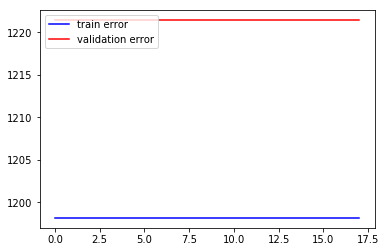

In [418]:
plt.plot(train_er2.values(),'b')
plt.plot(val_er2.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

## Ridge Regression

In [429]:
from sklearn.linear_model import Ridge
import numpy as np
val_err3={}
train_err3={}
n_samples, n_features = 10, 5
np.random.seed(0)
def print_model3(value,j):
    while value<100:
        y = labels_train
        X =features_train
        clf = Ridge(alpha=)
        clf.fit(X, y) 
        prediction = clf.predict(features_test)
        pred=clf.predict(features_train)
        #print("Accuracy :")
        #print(accuracy_score(dfg['Customers'],prediction))
        print'Train error :',mean_absolute_error(labels_train,pred)
        train_err3[j]=mean_absolute_error(labels_train,pred)
        print'validation error :',mean_absolute_error(labels_test,prediction)
        val_err3[j]=mean_absolute_error(labels_test,prediction)
        j=j+1
        value=value+10
        print'*********************************************************'
    

In [432]:
value=1
j=0
print_model3(value,j)

Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
Train error : 2056.98860304
validation error : 2

<function matplotlib.pyplot.show>

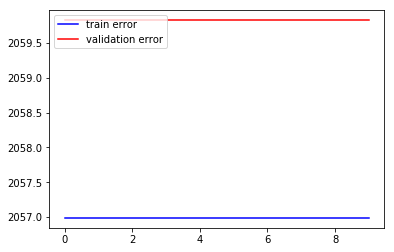

In [436]:
plt.plot(train_err3.values(),'b')
plt.plot(val_err3.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

### Lasso Regression

In [496]:
from sklearn import linear_model
val_err4={}
train_err4={}
def print_model4(i,j):
            clf = linear_model.Lasso(normalize=d[i],precompute=d[j])
            clf.fit(features_train,labels_train)
            prediction = clf.predict(features_test)
            pred=clf.predict(features_train)
            #print("Accuracy :")
            #print(accuracy_score(labels_test,prediction))
            print'Train error',mean_absolute_error(labels_train,pred)
            train_err4[i]=mean_absolute_error(labels_train,pred)
            print'Validation error :',mean_absolute_error(labels_test,prediction)
            val_err4[i]=mean_absolute_error(labels_test,prediction)
            print'*************************************************************'
            
    

In [498]:
a={1:True,2:False}
val={1:True,2:False}
for i in a:
    for j in val:
        print_model4(i,j)

Train error 2103.63048311
Validation error : 2104.38556575
*************************************************************
Train error 2103.63048311
Validation error : 2104.38556575
*************************************************************
Train error 2056.92757716
Validation error : 2059.74159369
*************************************************************
Train error 2056.92757716
Validation error : 2059.74159369
*************************************************************


<function matplotlib.pyplot.show>

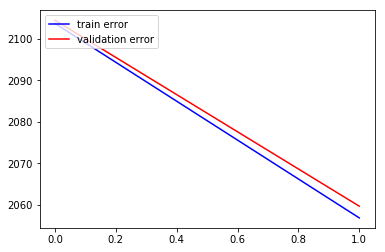

In [499]:
plt.plot(train_err4.values(),'b')
plt.plot(val_err4.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show

In [489]:
# TRAIL RIDGE
from sklearn.linear_model import Ridge
import numpy as np
val_err3={}
train_err3={}
n_samples, n_features = 10, 5
np.random.seed(0)
def print_model3(value,value1,i,j,k,l):
        y = labels_train
        X =features_train
        clf = Ridge(solver=value[i],normalize=value1[j])
        clf.fit(X, y) 
        prediction = clf.predict(features_test)
        pred=clf.predict(features_train)
        #print("Accuracy :")
        #print(accuracy_score(dfg['Customers'],prediction))
        print 'solver',value[i],'normalize',value1[j]
        print'Train error :',mean_absolute_error(labels_train,pred)
        train_err3[k]=mean_absolute_error(labels_train,pred)
        print'validation error :',mean_absolute_error(labels_test,prediction)
        val_err3[l]=mean_absolute_error(labels_test,prediction)
        print'*********************************************************'
    

In [490]:
value={1:'auto',2:'svd',3:'cholesky',4:'sparse_cg',5:'sag'}
value1={1:True,2:False}
k=1
l=1
for i in value:
    for j in value1:
        print_model3(value,value1,i,j,k,l)
        k=k+1
        l=l+1

solver auto normalize True
Train error : 2115.61892795
validation error : 2116.07364111
*********************************************************
solver auto normalize False
Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
solver svd normalize True
Train error : 2115.61892795
validation error : 2116.07364111
*********************************************************
solver svd normalize False
Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
solver cholesky normalize True
Train error : 2115.61892795
validation error : 2116.07364111
*********************************************************
solver cholesky normalize False
Train error : 2056.98860304
validation error : 2059.82354807
*********************************************************
solver sparse_cg normalize True
Train error : 2115.61976745
validation error : 2116.07453373
**********************

<function matplotlib.pyplot.show>

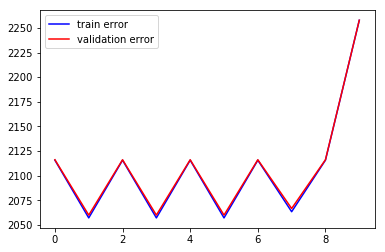

In [491]:
plt.plot(train_err3.values(),'b')
plt.plot(val_err3.values(),'r')
plt.legend(['train error', 'validation error'],loc='upper left')
plt.show